# Tabular Playground Series - Nov 2021
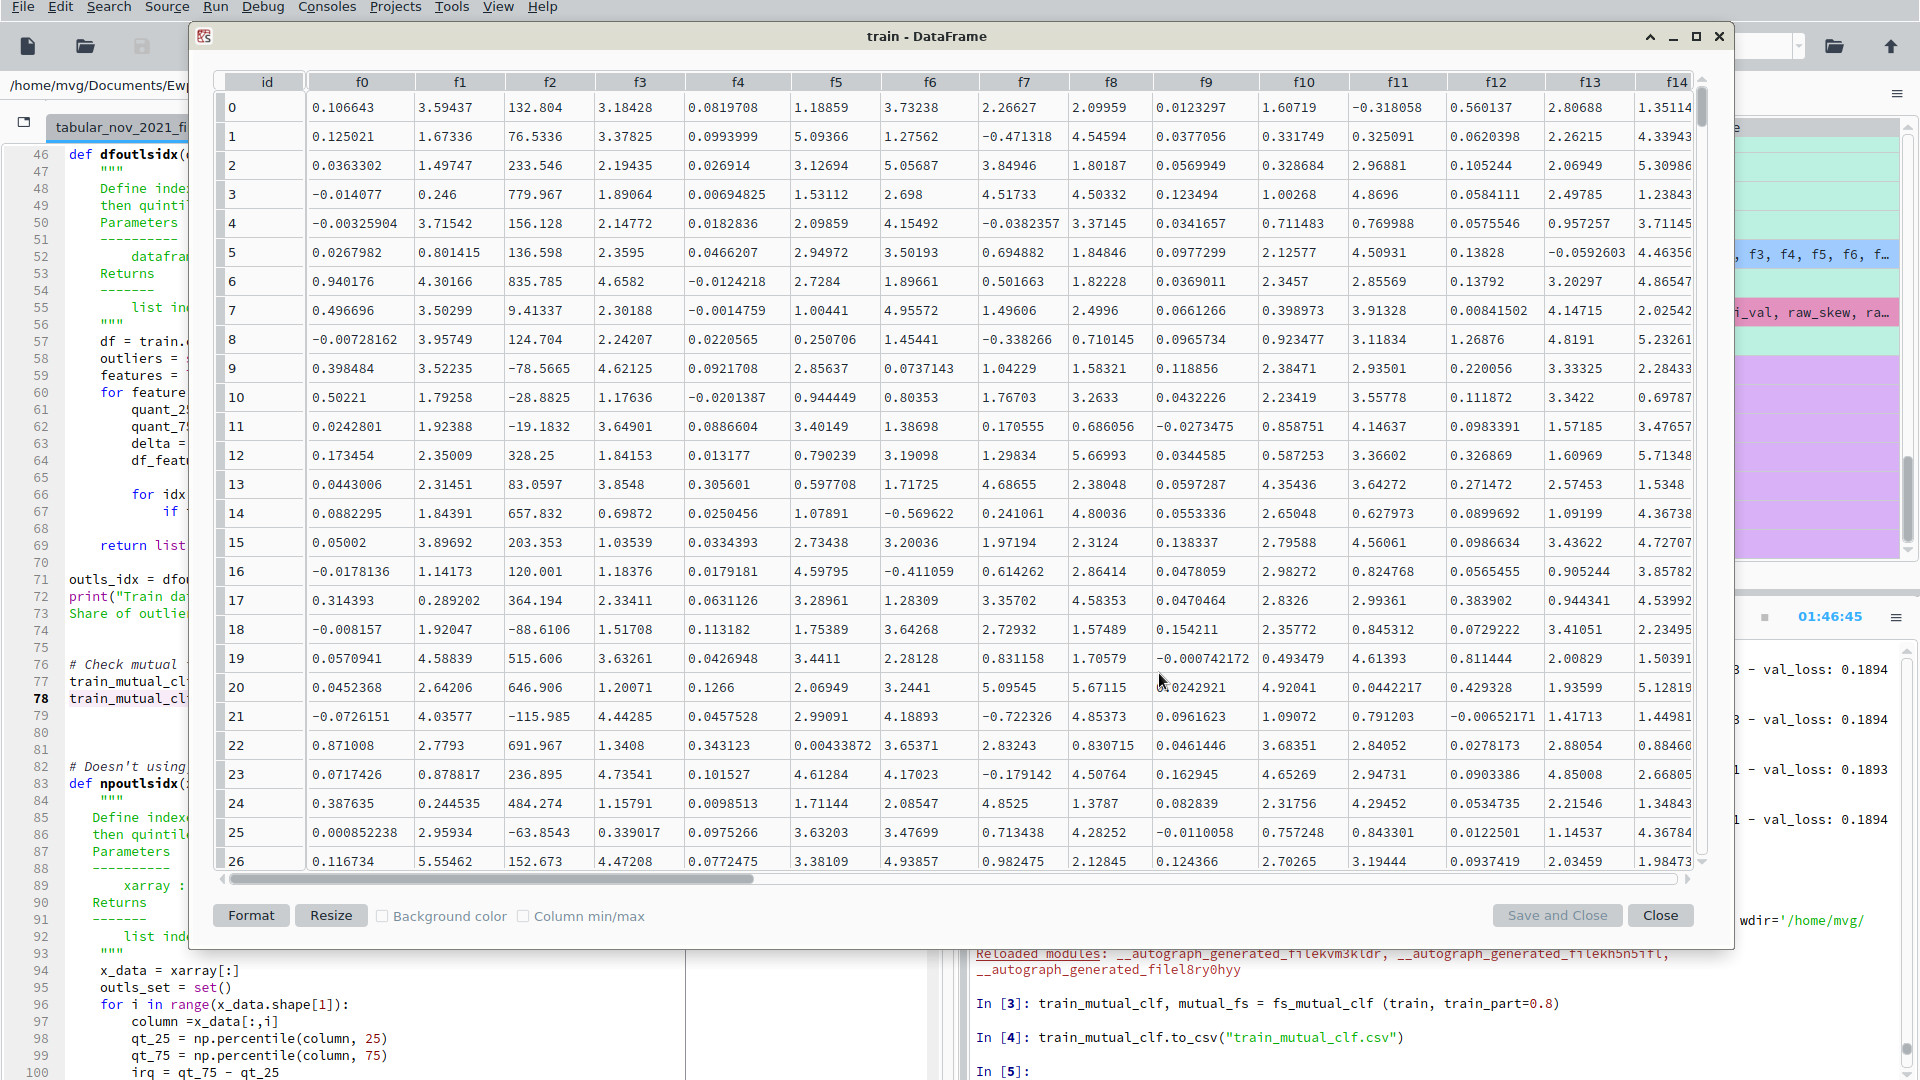

## 1. Exploratory data analyst



Load required libraries and open downloading datasets from this <a href="https://www.kaggle.com/c/tabular-playground-series-nov-2021/data" target="_blank"> link</a>.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from IPython.display import display
from IPython.display import HTML

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings

pd.options.display.max_columns = 110
pd.options.display.max_rows = 400


from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler


from tensorflow import keras
from keras.regularizers import l1
from keras.regularizers import l2
from keras.backend import sigmoid

from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import EarlyStopping

warnings.filterwarnings('ignore')  

2022-03-08 12:58:11.081785: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Open dataset and get general statistical data. For the calculation mutual information values for  сlassifier, I used my own function, so as not to clutter up the place with unnecessary code, I load the summary results of mutual values  and general statistics values from a cvs file.

In [2]:
%%time
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
submission = pd.read_csv("data/sample_submission.csv")
train.set_index("id", inplace=True)
# Check nan values
print("The train has {} features with nan values.".format(list(train.isnull().sum().values > 0).count(True)))
print("The test has {} features with nan values.".format(list(test.isnull().sum().values > 0).count(True)))
print("The sample_submission has with  {} features nan values.".format(list(submission.isnull().sum().values > 0).count(True)))
train_mutual_clf = pd.read_csv("train_mutual_clf.csv")
train_mutual_clf

The train has 0 features with nan values.
The test has 0 features with nan values.
The sample_submission has with  0 features nan values.
CPU times: user 13.3 s, sys: 1.76 s, total: 15.1 s
Wall time: 15.1 s


,Unnamed: 0,fs,cat,mi_val,raw_skew,raw_min,raw_max,raw_delta,raw_unique,raw_var,raw_mean,raw_std,pt_skew,pt_min,pt_max,pt_delta,pt_var,pt_mean,pt_std,qt_skew,qt_min,qt_max,qt_delta,qt_var,qt_mean,qt_std
0,0,target,num,1.000000,-0.024042,0.000000,1.000000,1.000000,2,0.249964,0.506010,0.499964,-0.024042,-1.012093,0.988051,2.000144,1.0,-2.540901e-16,1.0,-0.024042,-5.199338,5.199338,10.398675,27.029206,0.062496,5.198962
1,1,f34,num,0.009754,0.023004,-1.517720,6.582410,8.100130,410986,2.454143,2.463409,1.566571,-0.124700,-2.935852,2.438184,5.374036,1.0,3.257128e-16,1.0,-0.007648,-5.199338,5.199338,10.398675,0.999698,-0.000759,0.999849
2,2,f71,num,0.007264,-0.037328,-1.236730,6.516420,7.753150,401973,2.377366,2.632673,1.541871,-0.134107,-2.743451,2.399741,5.143192,1.0,-1.046866e-16,1.0,0.001841,-5.199338,5.199338,10.398675,1.004341,-0.001740,1.002168
3,3,f27,num,0.006615,2.722050,-2.281050,3.752360,6.033410,468021,0.013026,0.057945,0.114129,-0.371299,-38.491148,17.259738,55.750886,1.0,-1.515825e-18,1.0,0.010351,-5.199338,5.199338,10.398675,0.996604,-0.003690,0.998300
4,4,f55,num,0.005759,0.025584,-1.131580,6.351410,7.482990,397458,2.205884,2.571747,1.485222,-0.119325,-2.871718,2.364158,5.235876,1.0,9.915387e-16,1.0,-0.004325,-5.199338,5.199338,10.398675,0.993593,0.006420,0.996792
5,5,f91,num,0.005177,0.047625,-1.217700,6.573890,7.791590,409188,2.379330,2.444471,1.542508,-0.119028,-2.746521,2.458010,5.204531,1.0,2.041626e-16,1.0,0.009557,-5.199338,5.199338,10.398675,0.999749,0.001106,0.999874
6,6,f80,num,0.004990,0.009174,-1.142840,6.388890,7.531730,409160,2.486275,2.550175,1.576793,-0.136746,-2.690576,2.256180,4.946755,1.0,1.229713e-16,1.0,-0.000661,-5.199338,5.199338,10.398675,0.994803,-0.003480,0.997398
7,7,f43,num,0.004927,0.074306,-1.246410,6.507140,7.753550,413581,2.481095,2.500058,1.575149,-0.122944,-2.894138,2.295985,5.190123,1.0,2.084259e-16,1.0,0.004526,-5.199338,5.199338,10.398675,1.001579,-0.000571,1.000789
8,8,f41,num,0.004660,-0.027999,-1.637800,6.414540,8.052340,402568,2.362558,2.582621,1.537062,-0.126976,-3.037688,2.378746,5.416434,1.0,5.082512e-16,1.0,0.007786,-5.199338,5.199338,10.398675,1.003106,0.003532,1.001552
9,9,f8,num,0.004198,0.046116,-1.242020,6.389670,7.631690,403082,2.350047,2.538273,1.532986,-0.120171,-2.915410,2.308410,5.223820,1.0,5.445600e-16,1.0,0.005429,-5.199338,5.199338,10.398675,0.997801,-0.001002,0.998900


As I see above, I have the classical binary classification task with numeric continuous values for x_values  and binary y_values (1 or 0). Formally , only 70 values mutual information other than zero and deleting features with zero value should increase the accuracy value , but as I found out experimentally deleting features with a zero value mutual information decreasing  the accuracy values by 3-6%. File `train_mutual_clf.csv` with mutual information values you can download <a href="https://github.com/Vadim-Maklakov/Data-Science/blob/main/07_Kaggle_Tabular_Playground_Series-Nov%202021/train_mutual_clf.csv" target="_blank">here</a>. Let 's define the outliers quantity. 

In [3]:
%%time
def dfoutlsidx(dataframe):
    """
    Define indexes of outliers values less than quintile 25% - 1.5IRQ and more
    then quintile 75% + 1.5 IRQ for  continuous values of features.
    Parameters
    ----------
        dataframe : tested pandas dataframe 
    Returns
    -------
        list indexes of outliers values.
    """
    df = train.copy()
    outliers = set()
    features = list(df.columns)[:-1]
    for feature in features:
        quant_25 = df[feature].quantile(0.25)
        quant_75 = df[feature].quantile(0.75)
        delta = 1.5*(quant_75 - quant_25)
        df_feature = set(train[(train[feature] < quant_25 - delta) \
                               | (train[feature] > quant_75 + delta)].index)
        for idx in df_feature:
            if idx not in outliers:
                outliers.add(idx)
    return list(outliers)

outls_idx = dfoutlsidx(train)
print("Train dataset contains {:,} outliers values in the  {:,} rows.\n\
Share of outliers {:.3f}%".format(len(outls_idx), train.shape[0],
                              len(outls_idx)/train.shape[0]*100.0))

Train dataset contains 596,529 outliers values in the  600,000 rows.
Share of outliers 99.421%
CPU times: user 5.39 s, sys: 251 ms, total: 5.65 s
Wall time: 5.67 s


As seen above, almost all x_values of `train` dataset - outliers.

## 2. Determinate  model.

To be honest, I was surprised that DL  like ML, it does not have any clear and clear criteria for building a model - the number of hidden layers, the total number of neurons and numbers of neurons for each layer and the model you have to create empirically based on the rules `rule-of-thumbs` and your own experience or fantasy. For <a href="https://www.heatonresearch.com/2017/06/01/hidden-layers.html" target="_blank">example:</a>

`I have a few rules of thumb that I use to choose hidden layers. There are many rule-of-thumb methods for determining an acceptable number of neurons to use in the hidden layers, such as the following:
1.The number of hidden neurons should be between the size of the input layer and the size of the output layer.
2.The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
3.The number of hidden neurons should be less than twice the size of the input layer.`

At the first iteration I tried to use xgboost, randomforest and SVM from scikit-learn to solve this binary classification problem. When, after more than 12 hours, the pipeline cross validation with these three train dataset algorithms did not end, I decided to use tensorflow. Maximal accuracy have SVM (train:test ration = 1:4, 3 trials) ~ 0.64. 

At second iteration  I started with Tensorflow, I tried to write my own functions to determine the optimal number of neurons, hidden layers, activation functions and etc. I tried to use KerasClassifier - but I couldn't connect the loss_validation metric in it - as a result, I got a bunch of spaghetti code with monstrous time costs. Realizing that I was getting dirty in the abyss of writing functions that spend a lot of time, I searched the Internet and found <a href="https://autokeras.com/" target="_blank">AutoKeras</a>.

With the help of Autokers and Keras tuner I created  3 models in about five hours: 
1. Standard binary classifier `automl_clf` with  default settings from AutoKeras.
2. `automl_clf` was regularized by d1 and d2 and rename to `automl_tuner`. 
3. `automl_regr` is a standard linear regression model with default settings from AutoKeras. 
The code  for finding  all three models can be found at this <a href="https://github.com/Vadim-Maklakov/Data-Science/blob/main/07_Kaggle_Tabular_Playground_Series-Nov%202021/automl_hyper_tuning" target="_blank">link</a>. 

After finishing the work, these models were exported to `json` or inserted into a text file using the `get_config` method and typed manually. In these cases , the acceptable calculation speed for defining models and hyperparameters is given by batch_size = 1024 - 2048. Experimentally, it was found out that the maximum value for `validation_accuracy` and minimal values for `validation_loss` gives only StandardScaler



## 3. Train models

### 3.1 Train  `automl_clf` model.

Load required functions:

In [4]:
%%time
def dfsplit(dataframe, scaler=None):
    """
    Split dataframe to x_train, y_train, x_test, y_test on ratio 4:1. 
    Possible scale/transform option for x features:
    1. None – not scale or trainsform
    2. “ptbc”   Power-transformer by Box-Cox
    3. “ptbc” - .PowerTransformer by Yeo-Johnson’
    4. “rb” - .RobustScaler(
    5. "ss" - StandardScaler    
    For prevent data leakage using separate instance scaler/transformer 
    for each train and test parts.
    Parameters
    ----------
        dataframe : pandas dataframe with numeric values of features.
        scaler : TYPE - None or str, optional.  The default is None.
    Returns
    -------
        x_train, x_test, y_train, y_test - numpy arrays.
    """
    df = dataframe.copy()
    mms_train = MinMaxScaler(feature_range=(1, 2))
    mms_test = MinMaxScaler(feature_range=(1, 2))
    ptbc_train = PowerTransformer(method='box-cox')
    ptbc_test = PowerTransformer(method='box-cox')
    ptyj_train = PowerTransformer()
    ptyj_test = PowerTransformer()
    rb_train = RobustScaler(unit_variance=True)
    rb_test = RobustScaler(unit_variance=True)
    ss_train = StandardScaler()
    ss_test = StandardScaler()
    df = dataframe.copy()
    # split dataframe for train and test x and y nparrays
    x_all, y_all =df.iloc[:,:-1].values, np.ravel(df.iloc[:,[-1]].values)  
    x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y_all)
    # Transform or scale 
    scalers = [None, "ptbc", "ptyj", "rb", "ss"]
    if  scaler == None:
        x_train, x_test = x_train[:,:], x_test[:,:] 
    
    if scaler == "ptbc":
        x_train, x_test = \
            ptbc_train.fit_transform(mms_train.fit_transform(x_train[:,:])), \
            ptbc_test.fit_transform(mms_test.fit_transform(x_test[:,:]))
                         
    elif scaler == "ptyj":
        x_train, x_test = \
            ptyj_train.fit_transform(x_train[:,:]), \
            ptyj_test.fit_transform(x_test[:,:])
    elif scaler == "rb":
        x_train, x_test = \
            rb_train.fit_transform(x_train[:,:]), \
            rb_test.fit_transform(x_test[:,:])
    elif scaler == "ss":
        x_train, x_test = \
            ss_train.fit_transform(x_train[:,:]), \
            ss_test.fit_transform(x_test[:,:])
    if scaler not in scalers:
        return "Value error for 'scaler'!", "Enter None or", \
        "'ptbc' or", " 'ptyj' or 'rb' or 'ss' value for scaler!"
    return x_train, x_test, y_train, y_test


def df_transform(dataframe, scaler=None, y=True):
    """
    Split dataframe to x_train, y_train, x_test, y_test on ratio 4:1. 
    Possible scale/transform option for x features:
    1. None – not scale or trainsform
    2. “ptbc”   Power-transformer by Box-Cox
    3. “ptbc” - .PowerTransformer by Yeo-Johnson’
    4. “rb” - .RobustScaler(
    5. "ss" - StandardScaler    
    For prevent data leakage using separate instance scaler/transformer 
    for each train and test parts.
    Parameters
    ----------
        dataframe : pandas dataframe with numeric values of features.
        scaler : TYPE - None or str, optional.  The default is None.
    Returns
    -------
        If y==True: x_train, x_test, y_train, y_test - numpy arrays.
        If y==False: x_train, x_test - numpy arrays.
    """
    df = dataframe.copy()
    mms_all = MinMaxScaler(feature_range=(1, 2))
    ptbc_all = PowerTransformer(method='box-cox')
    ptyj_all = PowerTransformer()
    rb_all = RobustScaler(unit_variance=True)
    ss_all = StandardScaler()
    df = dataframe.copy()
    
    # split dataframe for train and test x and y nparrays
    if y==True:
        x_all, y_all =df.iloc[:,:-1].values, np.ravel(df.iloc[:,[-1]].values)  
    elif y==False:
        x_all =df.iloc[:,:].values
    if y not in [True, False]:
        return "Y value error!", "Enter or True or False!"
    # Transform or scale x_all 
    scalers = [None, "ptbc", "ptyj", "rb", "ss"]
    if  scaler == None:
        x_all = x_all[:,:] 
    
    if scaler == "ptbc":
        x_all = ptbc_all.fit_transform(mms_all.fit_transform(x_all[:,:]))
                         
    elif scaler == "ptyj":
        x_all = ptyj_all.fit_transform(x_all[:,:])
    
    elif scaler == "rb":
        x_all = rb_all.fit_transform(x_all[:,:]), \
    
    elif scaler == "ss":
        x_all =  ss_all.fit_transform(x_all[:,:])
        
    if scaler not in scalers:
        return "Value error for 'scaler'!", "Enter None or", \
        "'ptbc' or", " 'ptyj' or 'rb' or 'ss' value for scaler!"
    if y==True:
        return x_all, y_all
    elif y==False:
        return x_all
    
    
def automl_clf(shape_x, learn_rate=0.01):
    """
    Model created manually from json file model  from auto-keras
    Parameters
    ----------
       	shape_x :  integer,  equal of dimensions the  dataset features.
        learn_rate : float, value for learning_rate of optimizer. 
        Default value of learn_rate = 0.001.
    Returns
    -------
       	 model : the keras model
    """
    model = Sequential()
    # 0.Input
    model.add(InputLayer(input_shape=(100,), dtype='float64', name="input_1"))
    # Normalization input == StandardScaler
    model.add(Normalization(name='normalization'))
    
    # Hidden layer 1
    # 1.1 Initializer for first hidden layer input linear
    model.add(layers.Dense(units=32, kernel_initializer="GlorotUniform",
        bias_initializer='zeros', name="layer_1"))
    # 1.2 Activation for fisrt hidden layer
    model.add(layers.Activation(activations.relu, name="relu_1"))
    model.add(layers.Dropout(.25))
    
    # Hidden layer 2
    # 2.1 Initializer for first hidden layer input linear
    model.add(layers.Dense(units=32, kernel_initializer="GlorotUniform",
        bias_initializer='zeros', name="layer_2"))
    # 2.2 Activation for second hidden layer
    model.add(layers.Activation(activations.relu, name="relu_2"))
    model.add(layers.Dropout(.25))
    
    # Hidden layer 3
    # 3.1 Initializer for third hidden layer input linear
    model.add(layers.Dense(units=32, kernel_initializer="GlorotUniform",
        bias_initializer='zeros', name="layer_3"))
    # 3.2 Activation for second hidden layer
    model.add(layers.Activation(activations.relu, name="relu_3"))
    model.add(layers.Dropout(.25))
    
    # 4. Final sigmoid
    model.add(layers.Dense(units=1, kernel_initializer="GlorotUniform",
        bias_initializer='zeros', name="layer_4"))
    model.add(layers.Activation(activations.sigmoid, name="sigmoid_1"))
    
    model.compile(loss='binary_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=learn_rate),
              metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])
    return model


def train_model(model, dataframe, batch_sz=16384, stop_no=30, scaler=None,
                estimator="clf"):
    """
    Scale / Transform numeric features for fit and train model.
    Parameters
    ----------
    	model : keras model for fitting data.
    	Dataframe : pandas dataframe with numeric values of x and y .
    	batch_sz : integer, Size of the batch, optional. The default is 16384.
    	stop_no : integer, number of repeat for callback, optional. 
        The default is 30.
    	scaler : None or str, available values - None, "ptbc", "ptyj", 
        "rb", "ss", optional. Default is None.
    Returns
    -------
    	model : keras fitted and trained model
       	hist_stat : pandas dataframe with values  of metrics ane epochs for 
        model.
    """    
    callbacks = [EarlyStopping(monitor='val_loss',mode='min',
                               patience=stop_no,restore_best_weights=True)]
    df = dataframe.copy()
    scaler=scaler
    # split and scale or transform features
    x_train, x_test, y_train, y_test = dfsplit(df, scaler=scaler)
    # Fit and train model
    history = model.fit(x_train, y_train,
                        batch_size=batch_sz,
                        epochs=10000,
                        validation_data=(x_test,y_test),
                        callbacks=callbacks,
                        verbose=0)
    # Export history to dataframe
    hist_stat = pd.DataFrame(history.history)
    hist_stat["epochs"] = np.array(list(hist_stat.index))+1
    if estimator == "clf":
        hist_stat.sort_values("val_accuracy", ascending=False, inplace=True)
    elif estimator == "regr":
        hist_stat.sort_values("val_mean_squared_error", ascending=True, inplace=True)
    estimators = ["clf", "regr"]
    if estimator not in estimators:
        return "Estimator value error!", "Enter 'clf' of 'regr'!"
    hist_stat.reset_index(drop=True, inplace=True)
    return model, hist_stat


# Get model and model history
automl_clf_ss, automl_stat_clf_ss = train_model(automl_clf(train.shape[1]-1), 
                                          train, batch_sz=2048, scaler='ss')
automl_stat_clf_ss

2022-03-08 12:58:33.828728: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-08 12:58:33.863968: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.5185GHz coreCount: 5 deviceMemorySize: 1.95GiB deviceMemoryBandwidth: 104.43GiB/s
2022-03-08 12:58:33.864013: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-03-08 12:58:33.868764: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-03-08 12:58:33.868898: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-03-08 12:58:33.869978: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.1

CPU times: user 3min 36s, sys: 23.7 s, total: 4min
Wall time: 2min 2s


,loss,accuracy,auc,val_loss,val_accuracy,val_auc,epochs
0,0.572249,0.742875,0.751303,0.566111,0.745800,0.751328,61
1,0.572767,0.742058,0.749230,0.566262,0.745733,0.750550,31
2,0.572764,0.742960,0.749994,0.566017,0.745725,0.751667,52
3,0.572399,0.742979,0.750811,0.567126,0.745533,0.752069,57
4,0.572383,0.742588,0.751405,0.566872,0.745400,0.751181,63
5,0.572000,0.742829,0.751501,0.566055,0.745400,0.751388,66
6,0.572843,0.742823,0.750721,0.566150,0.745367,0.751166,55
7,0.572729,0.742723,0.750325,0.568322,0.745367,0.751661,51
8,0.572665,0.742725,0.750836,0.566882,0.745358,0.750852,58
9,0.571894,0.742948,0.751994,0.567372,0.745333,0.751586,65


### 3.2. Train `automl_tuner`.

In [5]:
%%time
def automl_tuner(shape_x):
    learning_rate = 0.0012589254117941675
    l1_kernel=0.0023713737056616554
    l2_bias = 0.0007943282347242813
    l1_val = 0.0001258925411794166
    
    model = Sequential()
    # 0.Input
    model.add(InputLayer(input_shape=(100,), dtype='float64', name="input_1"))
    model.add(Normalization(name='normalization'))
   
    # Hidden layer 1
    # 1.1 Initializer for first hidden layer input linear
    model.add(layers.Dense(units=32, kernel_initializer="GlorotUniform",
        bias_initializer='zeros', name="layer_1"))
    # l1 regularization
    model.add(layers.Dense(
        units=32, kernel_regularizer = tf.keras.regularizers.l1(l1_kernel),
        bias_regularizer=tf.keras.regularizers.l2(l2_bias),
        activity_regularizer=tf.keras.regularizers.l1(l1_val)))
    # 1.2 Activation for fisrt hidden layer
    model.add(layers.Activation(activations.relu, name="relu_1"))
    model.add(layers.Dropout(.25))
    
    # Hidden layer 2
    # 2.1 Initializer for first hidden layer input linear
    model.add(layers.Dense(units=32, kernel_initializer="GlorotUniform",
        bias_initializer='zeros', name="layer_2"))
    # l1 regularization
    model.add(layers.Dense(
        units=32, kernel_regularizer = tf.keras.regularizers.l1(l1_kernel),
        bias_regularizer=tf.keras.regularizers.l2(l2_bias),
        activity_regularizer=tf.keras.regularizers.l1(l1_val)))
    # 2.2 Activation for second hidden layer
    model.add(layers.Activation(activations.relu, name="relu_2"))
    model.add(layers.Dropout(.25))
    
    # Hidden layer 3
    # 3.1 Initializer for third hidden layer input linear
    model.add(layers.Dense(units=32, kernel_initializer="GlorotUniform",
        bias_initializer='zeros', name="layer_3"))
    # l1 regularization
    model.add(layers.Dense(
        units=32, kernel_regularizer = tf.keras.regularizers.l1(l1_kernel),
        bias_regularizer=tf.keras.regularizers.l2(l2_bias),
        activity_regularizer=tf.keras.regularizers.l1(l1_val)))
    # 3.2 Activation for second hidden layer
    model.add(layers.Activation(activations.relu, name="relu_3"))
    model.add(layers.Dropout(.25))
    
    # 4. Final sigmoid
    model.add(layers.Dense(units=1, kernel_initializer="GlorotUniform",
        bias_initializer='zeros', name="layer_4"))
    model.add(layers.Activation(activations.sigmoid, name="sigmoid_1"))
    
    model.compile(loss='binary_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])
    return model

automl_clf_ss_tuner, automl_stat_clf_ss_tuner = train_model(automl_tuner(train.shape[1]-1), 
                                          train, batch_sz=2048, scaler='ss')
automl_stat_clf_ss_tuner

CPU times: user 7min 52s, sys: 48.2 s, total: 8min 40s
Wall time: 4min 28s


,loss,accuracy,auc,val_loss,val_accuracy,val_auc,epochs
0,0.576827,0.745129,0.747650,0.569928,0.748158,0.749932,101
1,0.576777,0.745017,0.748339,0.570304,0.748083,0.749636,85
2,0.576838,0.745348,0.747420,0.571168,0.748067,0.749590,111
3,0.576545,0.745310,0.747895,0.570381,0.747817,0.749620,115
4,0.576606,0.745267,0.748264,0.570141,0.747767,0.749373,108
5,0.576974,0.745260,0.747963,0.570880,0.747767,0.750217,93
6,0.577697,0.744756,0.748278,0.572759,0.747767,0.750664,69
7,0.576882,0.745200,0.748125,0.571151,0.747742,0.749463,97
8,0.576331,0.745273,0.748320,0.570086,0.747742,0.749627,119
9,0.576441,0.745529,0.748171,0.571553,0.747700,0.750024,120


As see above increasing validation_accuracy for regularized classifier model hasn't radically improve, in this case, it is within the statistical error but iteration numbers increasing by two times comparing non regularized classifier model. 

### 3.3 Train `automl_regr`

In [6]:
%%time
def automl_regr(shape_x, learn_rate=0.001):
    """
    Regression Model created manually from json file model  from auto-keras
    Parameters
    ----------
       	shape_x :  integer,  equal of dimensions the  dataset features.
        learn_rate : float, value for learning_rate of optimizer. 
        Default value of learn_rate = 0.001.
    Returns
    -------
       	 model : the keras model
    """
    model = Sequential()
    # 0.Input
    model.add(InputLayer(input_shape=(100,), dtype='float64', name="input_1"))
    # Normalization input
    model.add(Normalization(name='normalization'))
    
    # Hidden layer 1
    # 1.1 Initializer for first hidden layer input linear
    model.add(layers.Dense(units=32, kernel_initializer="GlorotUniform",
        bias_initializer='zeros', name="layer_1"))
    # 1.2 Activation for fisrt hidden layer
    model.add(layers.Activation(activations.relu, name="relu_1"))
    
    # Hidden layer 2
    # 2.1 Initializer for first hidden layer input linear
    model.add(layers.Dense(units=32, kernel_initializer="GlorotUniform",
        bias_initializer='zeros', name="layer_2"))
    # 2.2 Activation for second hidden layer
    model.add(layers.Activation(activations.relu, name="relu_2"))
    model.add(layers.Dropout(.25))
    
    # 3. Final linear 
    model.add(layers.Dense(units=1, kernel_initializer="GlorotUniform",
        bias_initializer='zeros', name="layer_3"))
    model.add(layers.Activation(activations.linear, name="regression_head_1"))
    
    model.compile(loss='mean_squared_error', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=learn_rate),
              metrics=['mean_squared_error'])
    return model


automl_regr_ss, automl_regr_ss_stat = train_model(automl_regr(train.shape[1]-1), 
                                              train, batch_sz=2048, scaler='ss',
                                              estimator="regr")
automl_regr_ss_stat

CPU times: user 1min 38s, sys: 9.37 s, total: 1min 48s
Wall time: 58 s


,loss,mean_squared_error,val_loss,val_mean_squared_error,epochs
0,0.190724,0.190724,0.188966,0.188966,26
1,0.190984,0.190984,0.188989,0.188989,22
2,0.191103,0.191103,0.189021,0.189021,21
3,0.190979,0.190979,0.189066,0.189066,23
4,0.190800,0.190800,0.189071,0.189071,24
5,0.191058,0.191058,0.189071,0.189071,20
6,0.190123,0.190123,0.189078,0.189078,31
7,0.190840,0.190840,0.189102,0.189102,25
8,0.191267,0.191267,0.189125,0.189125,19
9,0.190347,0.190347,0.189131,0.189131,29


## 4. Define best estimator

In [7]:
%%time
# Transform and divide x and y for train dataset
x_all, y_all = df_transform(train, scaler="ss")

# Predict y_all for all models  and select best estimator using accuracy metric
y_pred_automl_clf = automl_clf_ss.predict(x_all, batch_size=2048, verbose=1)
y_pred_automl_clf_conv = np.where(y_pred_automl_clf < 0.5, 0, 1)


y_pred_automl_clf_tuner = automl_clf_ss_tuner.predict(x_all, batch_size=2048, 
                                                      verbose=1)
y_pred_automl_clf_tuner_conv = np.where(y_pred_automl_clf_tuner < 0.5, 0, 1)


y_pred_automl_regr_ss = automl_regr_ss.predict(x_all, batch_size=2048, 
                                                      verbose=1)
y_pred_automl_regr_ss_conv = np.where(y_pred_automl_regr_ss < 0.5, 0, 1)

293/293 [==============================] - 1s 2ms/step
CPU times: user 4.36 s, sys: 1.12 s, total: 5.48 s
Wall time: 4.68 s


Compare accuracy:

In [8]:
%%time
accuracy_automl_clf = accuracy_score(y_all, y_pred_automl_clf_conv)
accuracy_automl_clf_tuner = accuracy_score(y_all, y_pred_automl_clf_tuner_conv)
accuracy_automl_regr = accuracy_score(y_all, y_pred_automl_regr_ss_conv)

CPU times: user 177 ms, sys: 6.77 ms, total: 184 ms
Wall time: 186 ms


In [9]:
print(f"Accuracy for `automl_clf` model: {accuracy_automl_clf:.4f}.")
print(f"Accuracy for `automl_clf_tuner` model: {accuracy_automl_clf_tuner:.4f}.")
print(f"Accuracy for `automl_regr` model: {accuracy_automl_regr:.4f}.")

Accuracy for `automl_clf` model: 0.7456.
Accuracy for `automl_clf_tuner` model: 0.7473.
Accuracy for `automl_regr` model: 0.7470.


As see above, the best accuracy has `automl_regr` model.

## 5. Predict target for test dataset using `automl_regr` model

In [10]:
# Open and read test dataset
test  = pd.read_csv("data/test.csv")
test.set_index("id", inplace=True)

# Set id as index for submission
# submission.set_index("id", inplace=True)

# Convert test x values  with StandardScaler
test_ss = df_transform(test, scaler="ss", y=False)

# Predict target and convert to binary format
predict_target = automl_regr_ss.predict(test_ss, batch_size=2048, 
                                                    verbose=1)
predict_target_conv = np.where(predict_target < 0.5, 0, 1)

# Fill `target` column
submission["target"] = predict_target_conv

# Save predict
submission.to_csv("submission_pred.csv")

submission.head(18)

264/264 [==============================] - 0s 1ms/step


,id,target
0,600000,1
1,600001,1
2,600002,1
3,600003,1
4,600004,1
5,600005,0
6,600006,0
7,600007,1
8,600008,1
9,600009,0


## 6. Conclusions


1. Auto-Keras gives a completely workable model and may in the future get rid of manual work that takes a lot of time to build an optimal model and a selection of hyperparameters.


2. In this case, the l2/l2 regularization of the classifier model did not bring any visible improvements, but only increased the execution time. It turned out that a simple regression has accuracy comparable with regularized l1/l2 classifier. l2/l2 regularization isn't always the  silver bullet. The possible reason is a wild outliers amount. 


3. I was pleased with the speed of the old GTX 1050 2GB RAM graphics accelerator with a data set containing 600K rows and 100 columns (60M cells), which takes several minutes to process and cross-validate. As I wrote earlier, when trying to choose the optimal algorithm from the classic ML between boost, random forest and SVM, the cross validation time took more than 12 hours. ML is dead long live DL, using  ML is justified on small datasets with several thousand rows, with an increase in the amount of data ML loses in speed to DL. Advice for those who do not have modern video cards - lower the TF version for example, GTX 1050 2GB RAM works quite correctly  by this dataset with TF 2.5,  with version TF above, out of memory problems begin.


4. This dataset itself turned out to be a tough nut to crack. High accuracy given only with StandardScaler,  all other transformations from classical ML  - MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer, KBinsDiscretizer, Normalizer  had lower values of accuracy values and high time of executions. Also, the removal algorithms of outliers from scikit-learn doesn't work with this dataset.


5. I avoided data leakage everywhere, but if  using standard scaling  for the entire train dataset, it can be increased accuracy by rough 0.005.




Created on Mart 08, 2022

@author: Vadim Maklakov, used some ideas from public Internet resources.

© 3-clause BSD License

Software environment: Debian 11, Python 3.8.12, TensorFlow 2.5.1 for notebook, TensorFlow 2.8 for defining model with Auto-Keras.

See required installed and imported python modules in the cell No 1.